# Wine Quality Analysis

In [6]:
# Importing required libraries (Install all these packages)
import pandas as pd
import numpy as np
import plotly_express as px
from scipy.stats import spearmanr

In [7]:
# Reading data
white_df = pd.read_csv("winequality-white.csv", sep = ";")
red_df = pd.read_csv("winequality-red.csv", sep = ";")
# Assigning 1 label for white and 0 for red
white_df['label'] = 1
red_df['label'] = 0
combined_df = pd.concat([white_df, red_df])

In [8]:
combined_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


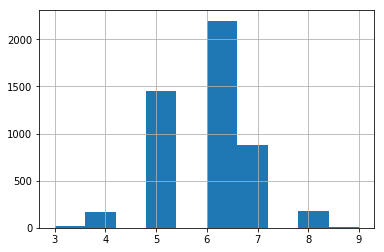

In [44]:
white_df['quality'].hist()

In [41]:
px.histogram(white_df, x = 'quality')

## Correlation between Quality and Other features for white wine

In [37]:
features = [x for x in white_df.columns if x not in ['quality', 'label']]
y = 'quality'
corr_white = list()
for f in features:
    corr_white.append(list(spearmanr(white_df[f], white_df[y])))
    
corr_white = pd.DataFrame(corr_white, columns = ['correlation', 'p_value'])
corr_white['feature'] = features
corr_white = corr_white.sort_values('correlation', ascending=False)

In [38]:
px.histogram(corr_white, x = 'feature', y = 'correlation', histfunc='avg')

## Correlation between Quality and Other features for Red wine

In [39]:
features = [x for x in red_df.columns if x not in ['quality', 'label']]
y = 'quality'
corr_red = list()
for f in features:
    corr_red.append(list(spearmanr(red_df[f], red_df[y])))
    
corr_red = pd.DataFrame(corr_red, columns = ['correlation', 'p_value'])
corr_red['feature'] = features
corr_red = corr_red.sort_values('correlation', ascending=False)

In [40]:
px.histogram(corr_red, x = 'feature', y = 'correlation', histfunc='avg')